# Laboratorio 3.2: Bloc de notas del estudiante

## Información general

Este laboratorio es una continuación de los laboratorios guiados del Módulo 3. 

## Presentación del escenario empresarial

Usted trabaja para un proveedor de atención médica y desea mejorar la detección de anomalías en pacientes ortopédicos. 

Tiene la tarea de resolver este problema mediante el aprendizaje automático. Tiene acceso a un conjunto de datos que contiene seis características biomecánicas y un objetivo de *normal* o *anormal*. Puede utilizar este conjunto de datos para entrenar un modelo de aprendizaje automático para predecir si un paciente va a tener una anomalía.

## Acerca de este conjunto de datos
Este conjunto de datos biomédicos fue creado por el Dr. Henrique da Mota durante un período de residencia médica en el Grupo de Investigación Aplicada en Ortopedia (GARO, Group of Applied Research in Orthopaedics) del Centre Médico-Chiurgical de Réadaptation des Massues, Lyon, Francia. Los datos se han organizado en dos tareas de clasificación diferentes, pero relacionadas. 

La primera tarea consiste en clasificar a los pacientes como pertenecientes a una de tres categorías: 

- *Normal* (100 pacientes)
- *Hernia de disco* (60 pacientes)
- *Espondilolistesis* (150 pacientes)

Para la segunda tarea, las categorías *Hernia de disco* y *Espondilolistesis* se fusionaron en una sola categoría etiquetada como *anormal*. Por lo tanto, la segunda tarea consiste en clasificar a los pacientes como pertenecientes a una de dos categorías: *Normal* (100 pacientes) o *Anormal* (210 pacientes).


## Información de atributos

Cada paciente está representado en el conjunto de datos por seis atributos biomecánicos que se derivan de la forma y orientación de la pelvis y la columna lumbar (en este orden): 

- Incidencia pélvica
- Inclinación pélvica
- Ángulo de lordosis lumbar
- Inclinación del sacro
- Radio pélvico
- Grado de espondilolistesis

La siguiente convención se utiliza para las etiquetas de clase: 
- Hernia Disco (HD)
- Espondilolistesis (EL)
- Normal (NO) 
- Anormal (AN)


Para obtener más información acerca de este conjunto de datos, consulte [Página web del conjunto de datos de la columna vertebral] (http://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

## Atribuciones del conjunto de datos
Este conjunto de datos se obtuvo de:
Dua, D. y Graff, C. (2019). Repositorio de aprendizaje automático de la UCI (http://archive.ics.uci.edu/ml). Irvine, CA: Universidad de California, Escuela de Ciencias de la Información e Informática.


# Configuración del laboratorio
Dado que esta solución se divide en varios laboratorios de este módulo, debe ejecutar las siguientes celdas para poder cargar los datos:

## Importación de los datos

In [1]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

In [2]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

In [3]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])

# Paso 1: Explorar los datos
Comenzará por observar los datos del conjunto de datos. 

Para sacar el máximo provecho de este laboratorio, lea detenidamente las instrucciones y el código antes de ejecutar las celdas. ¡Tómese el tiempo para experimentar!

Primero, usará **forma** para examinar el número de filas y columnas.

In [4]:
df.shape

(310, 7)

Obtendrá una lista de las columnas.

In [5]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Puede ver las seis características biomecánicas, y la columna objetivo se denomina *clase*.

¿Qué tipos de columna tiene?

In [6]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

Tiene seis flotantes para las características biomecánicas, pero el objetivo es una clase.

Para ver las estadísticas de la primera columna, puede usar la función **describir**.

In [7]:
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

**Tarea de desafío:** Intente actualizar el código de la celda anterior para ver las estadísticas de otras características. ¿Qué características tienen valores atípicos que podría querer examinar?

Dado que este conjunto de datos solo tiene seis características, puede mostrar las estadísticas de cada característica ejecutando **describir** en todo el DataFrame.

In [8]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**Pregunta:** ¿Hay alguna característica que no esté bien distribuida? ¿Hay alguna característica con valores atípicos que desee ver? ¿Parece que podría haber alguna correlación entre las características?

No siempre es fácil realizar observaciones cuando solo se miran los números, por lo que ahora graficará estos valores.

<Axes: >

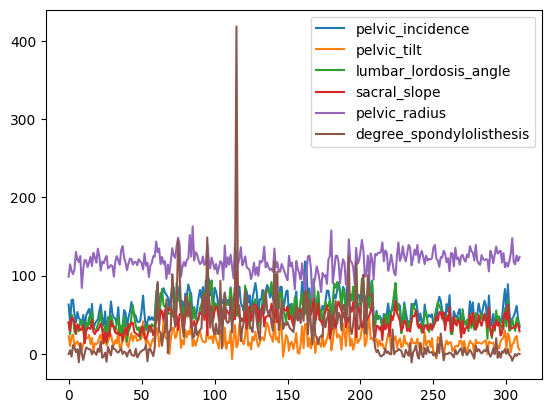

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

Ahora va a trazar la distribución de los valores de cada característica utilizando un *gráfico de densidad o estimación de densidad de kernel* (KDE, kernel density estimate).

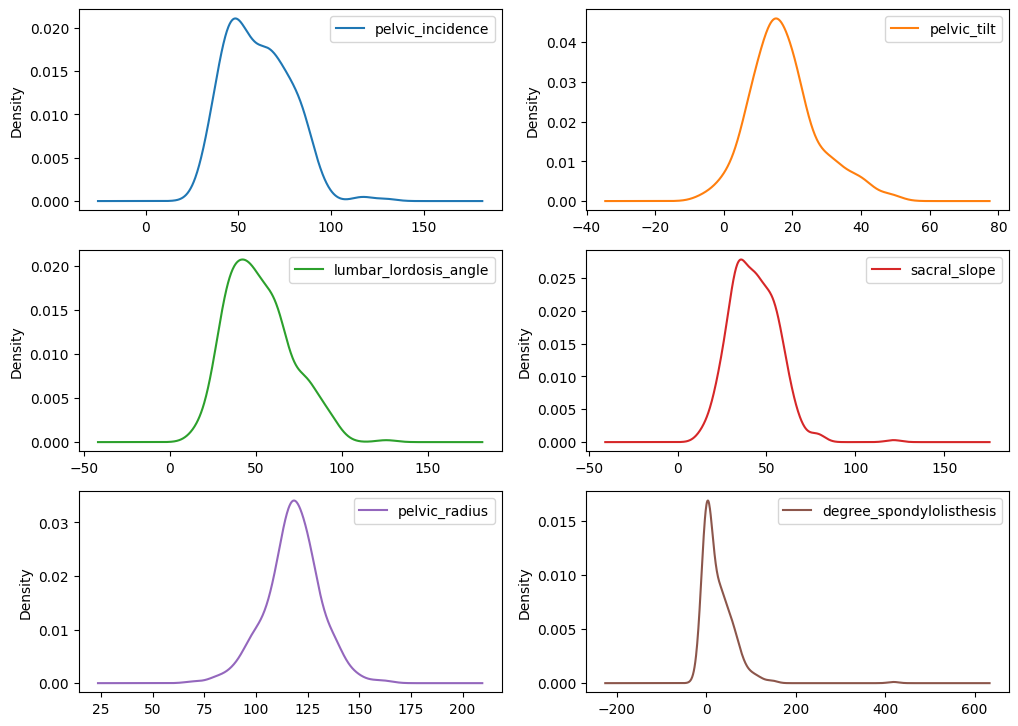

In [10]:
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

¿Alguna de las visualizaciones se destaca?

### Investigación de grado_espondilolistesis
Ahora investigará **grado_de_espondilolistesis**:

Comience con el *gráfico de densidad* que, si recuerda, muestra la *distribución de los valores*.

<Axes: ylabel='Density'>

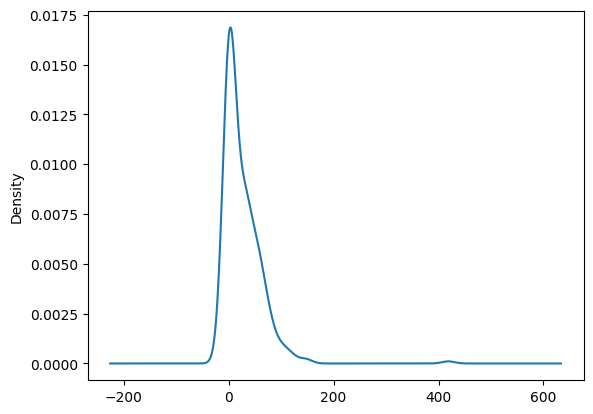

In [11]:
df['degree_spondylolisthesis'].plot.density()

Un gráfico de densidad suaviza la curva. Al parecer podría haber un aumento de alrededor de **400**. Visualice los datos con un *histograma*.

<Axes: ylabel='Frequency'>

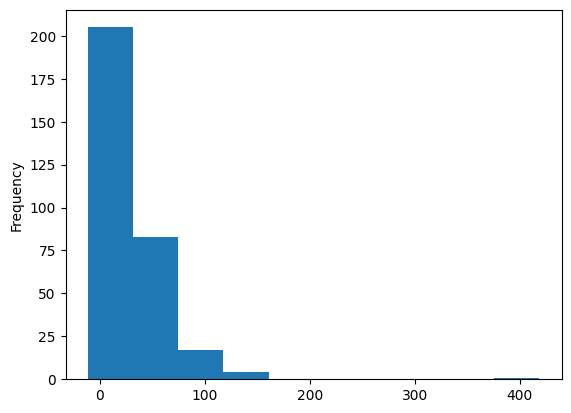

In [12]:
df['degree_spondylolisthesis'].plot.hist()

Mediante el uso de una *gráfica de caja*, puede ver si hay valores atípicos.

<Axes: >

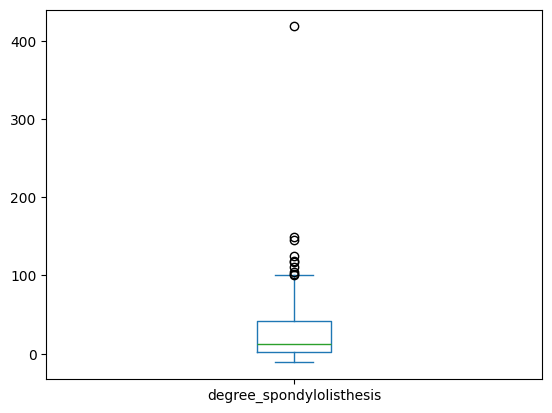

In [13]:
df['degree_spondylolisthesis'].plot.box()

Se puede ver un pequeño aumento de alrededor de **400**. En ocasiones, los valores atípicos como este pueden alterar los modelos de entrenamiento. La única forma de averiguar si esto ocurre sería probar el modelo con y sin los valores atípicos, y comparar las puntuaciones que arrojan. Sin embargo, esta es una tarea para un laboratorio posterior.

Puede ver en la gráfica de caja que parece haber un clúster por encima de lo que *parecer ser* el máximo. ¿Existe una correlación entre esos puntos de datos y el objetivo?

Antes de que pueda buscar una correlación, deberá examinar más el objetivo.

### Análisis del objetivo

Primero, ¿con qué tipo de distribución cuenta?

In [14]:
df['class'].value_counts()

class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64

Al parecer tiene alrededor de 1/3 *Normal* y 2/3 *Anormal*. Este resultado debería estar bien, pero si pudiera obtener más datos, podría intentar equilibrar un poco más los números. 

Los valores de clase no funcionarán para su modelo de aprendizaje automático, por lo que deberá convertir esta columna en un valor numérico. Para esta tarea, puede utilizar un *mapeador*.

In [15]:
class_mapper = {b'Abnormal':1,b'Normal':0}
df['class']=df['class'].replace(class_mapper)

Ahora, puede trazar el *grado_de_espondilolistesis* y compararlo con el objetivo.

<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

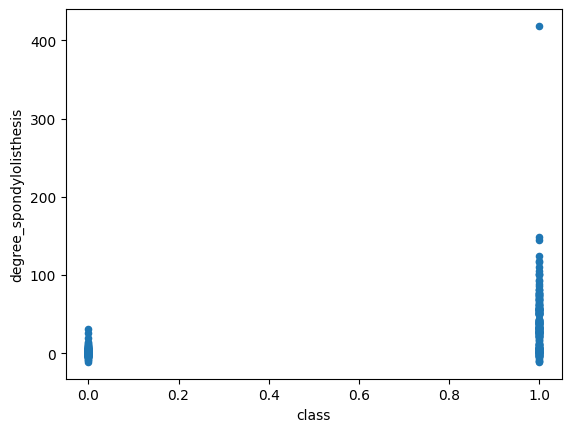

In [16]:
df.plot.scatter(y='degree_spondylolisthesis',x='class')

¿Qué es lo que ve?

Si bien pareciera haber un vínculo entre los valores altos y las anormalidades, también hay muchos valores que se encuentran en el mismo rango. Entonces, podría haber una correlación, pero vale la pena echar un vistazo más de cerca a los datos.

**Tarea de desafío:** Mediante el uso de las celdas anteriores, determine cómo se corresponden los valores de otras características en relación con el objetivo.

### Visualización de múltiples variables

Como se demuestra en los pasos anteriores, las visualizaciones pueden ser muy importantes. En ocasiones, querrá analizar varios puntos de datos. Puede hacerlo usando *agruparpor*.

Trazar las características de los valores *Anormal* y *Normal* uno al lado del otro podría ayudarlo a observar otras diferencias.

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

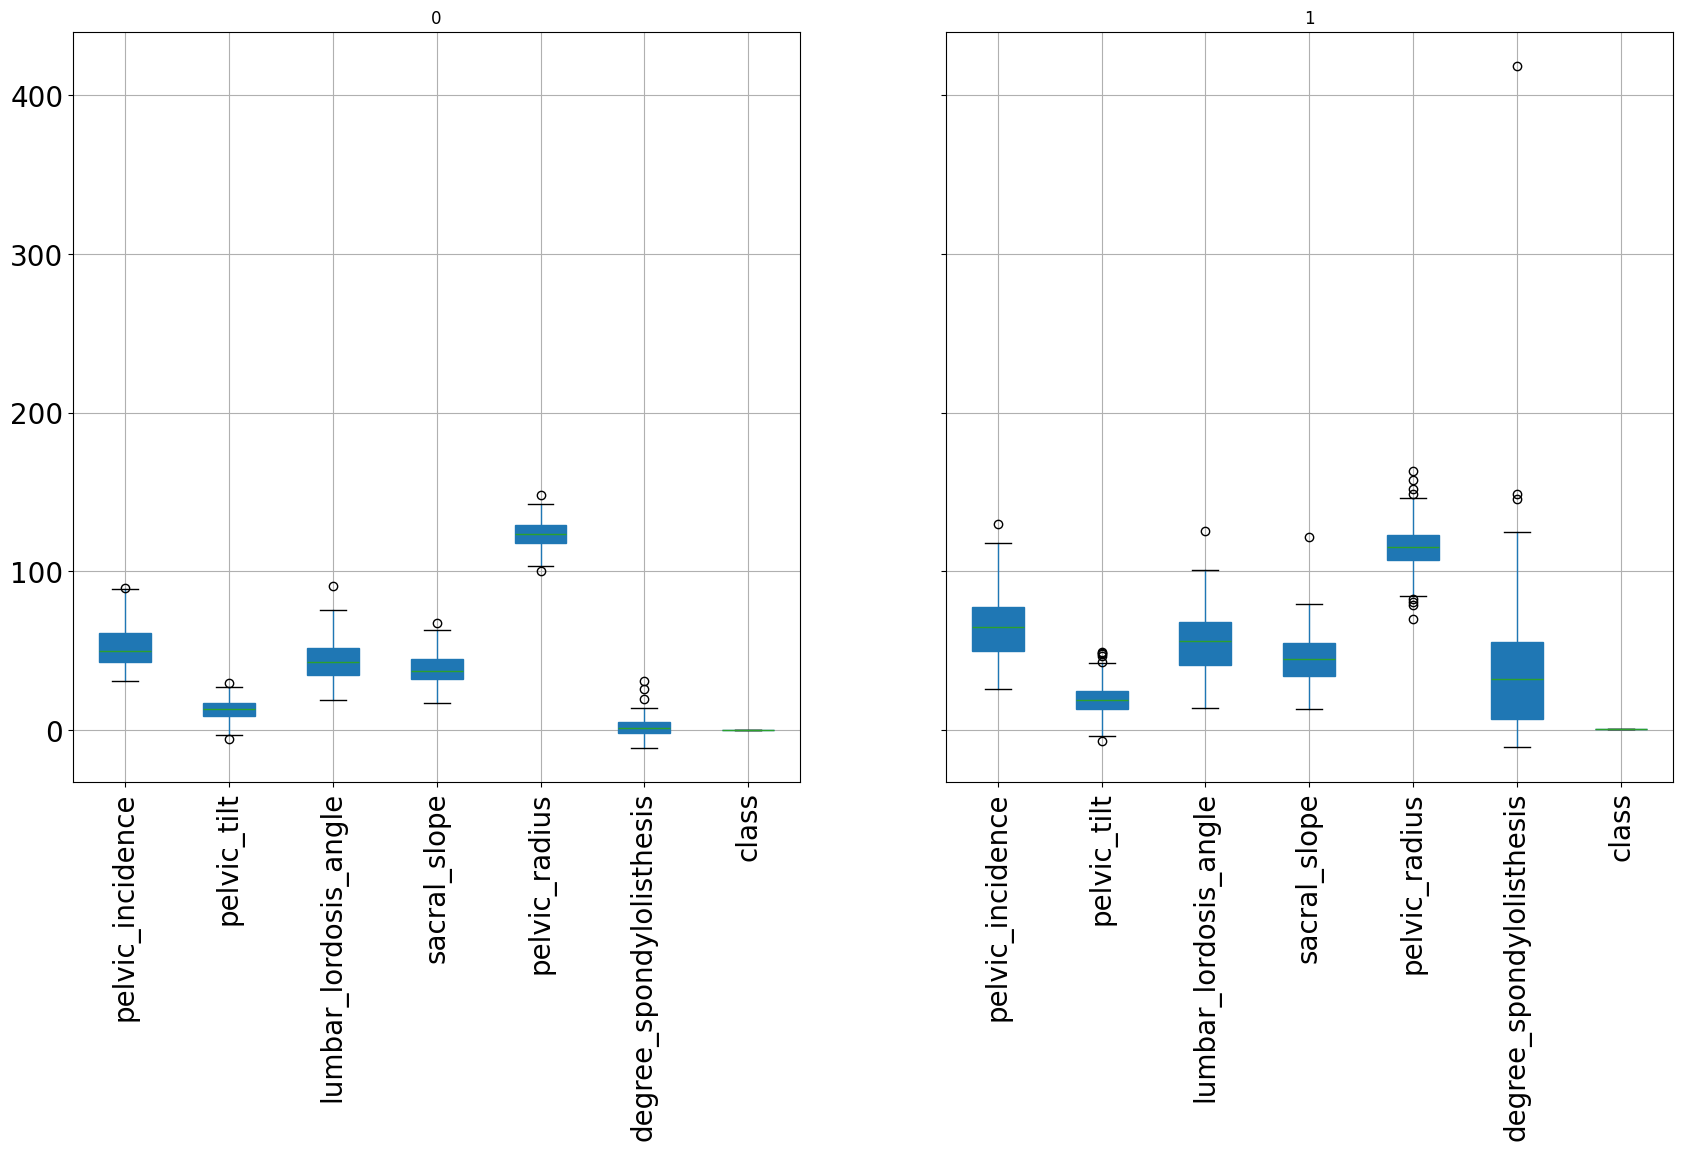

In [17]:
df.groupby('class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

Mediante la función **corr**, puede crear una matriz de correlación para todo el conjunto de datos.

In [18]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
degree_spondylolisthesis    0.443687
pelvic_incidence            0.353336
pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
Name: class, dtype: float64

También puede trazar estos datos.

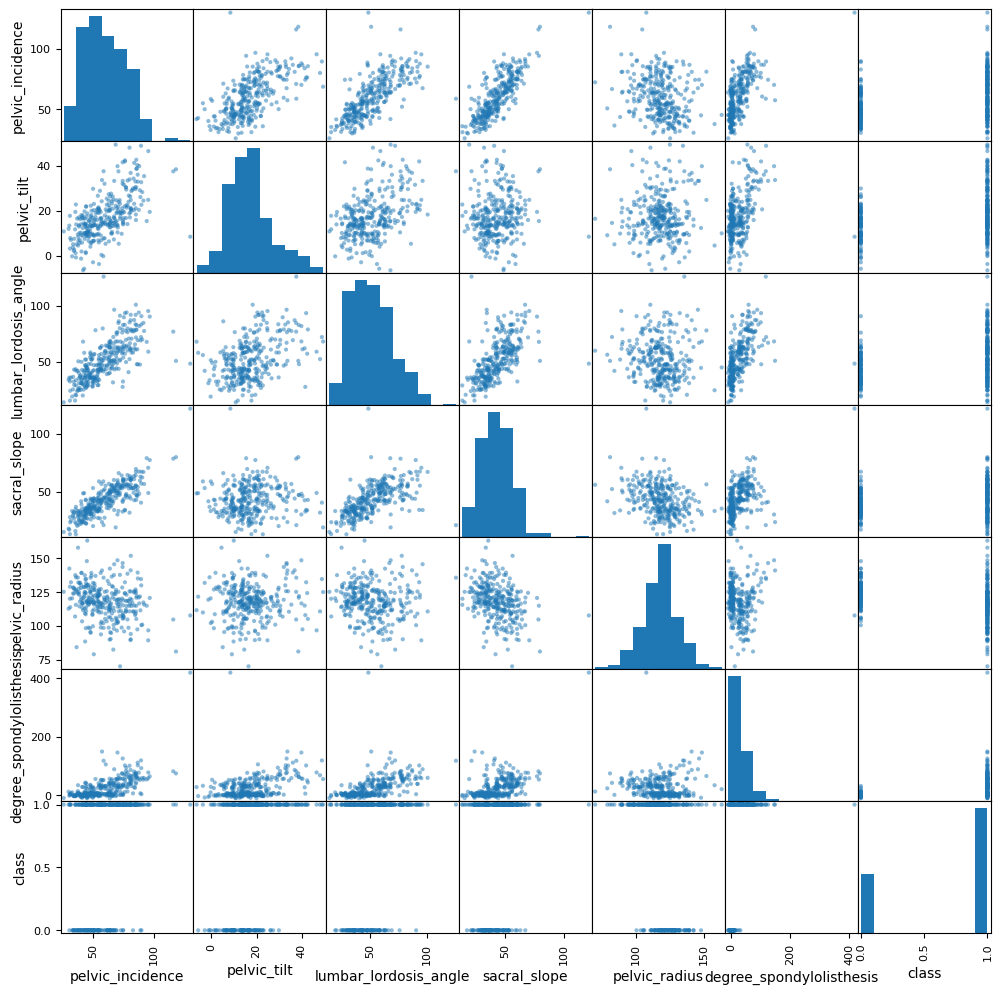

In [19]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

Mediante el uso de **seaborn**, puede visualizar la correlación como un *mapa de calor*.

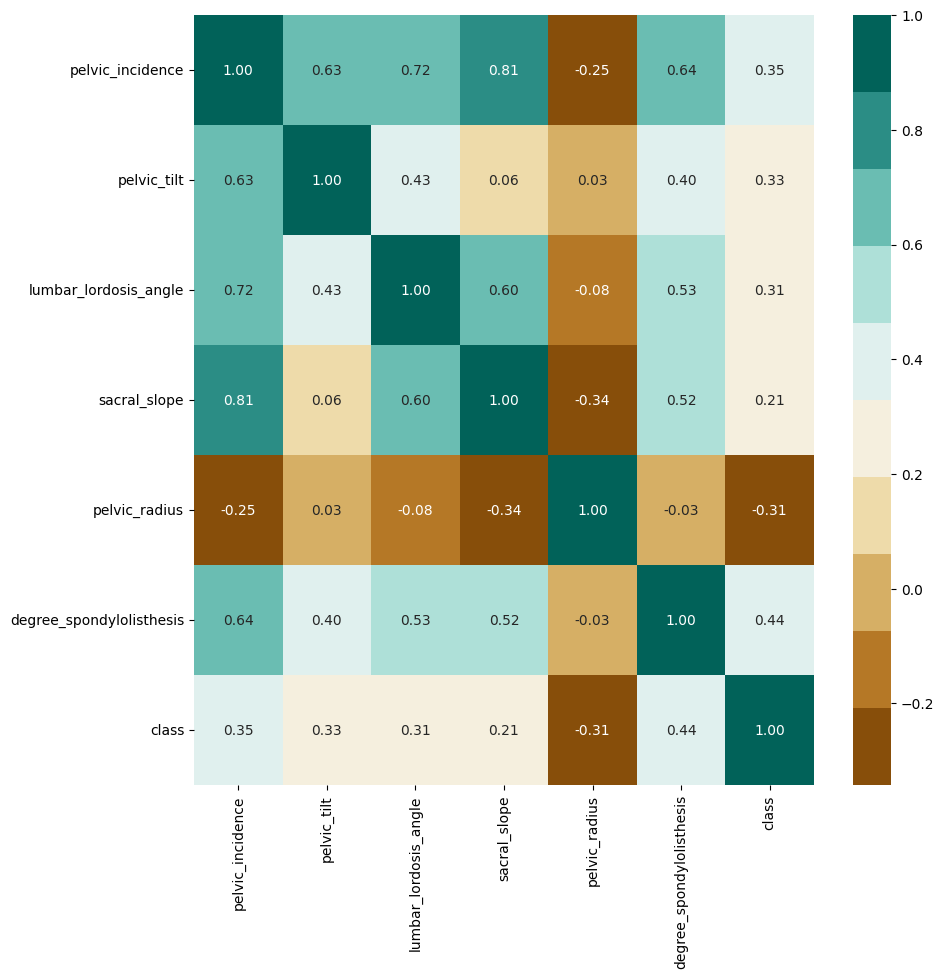

In [20]:
import seaborn as sns
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

**Tarea de desafío:** Encuentre otros datos del repositorio de aprendizaje automático de la UCI. Usando el código anterior como referencia, ¡vaya a explorar!


## Exploración adicional: dataset Zoo (UCI)
Usaremos el conjunto *Zoo* del repositorio UCI para repetir el flujo de exploración: carga, inspección básica y visualización rápida de correlaciones.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests, zipfile, io
zoo_url = "https://archive.ics.uci.edu/static/public/111/zoo.zip"
zoo_cols = ["animal_name","hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]
zoo_zip = zipfile.ZipFile(io.BytesIO(requests.get(zoo_url).content))
with zoo_zip.open("zoo.data") as f:
    zoo_df = pd.read_csv(f, header=None, names=zoo_cols)
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
print("Filas, columnas:", zoo_df.shape)
zoo_df["type"].value_counts()

Filas, columnas: (101, 18)


type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [31]:
zoo_df.drop(columns=["animal_name"]).describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


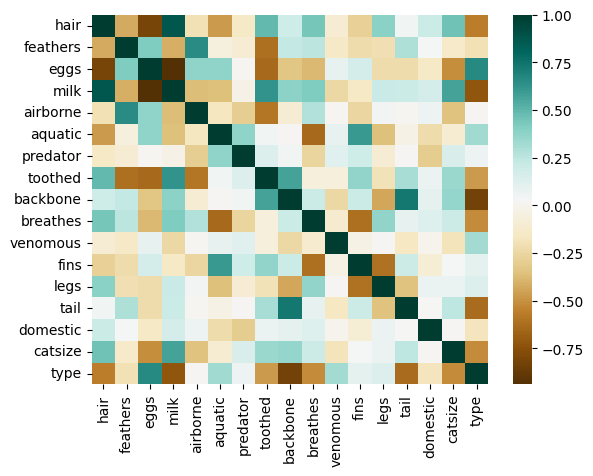

In [32]:
zoo_numeric = zoo_df.drop(columns=["animal_name"])
zoo_corr = zoo_numeric.corr()
sns.heatmap(zoo_corr, annot=False, cmap="BrBG", fmt=".2f")
plt.show()

# ¡Felicitaciones!

Ha completado este laboratorio y ahora puede terminarlo siguiendo las instrucciones de la guía del laboratorio.